# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/9ad03d45b78bef0fe159c09aef98bda55e72a4bc59168beba135db95.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Sacramento, California, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'9ad03d45b78bef0fe159c09aef98bda55e72a4bc59168beba135db95')

### Explore the data

In [2]:
from sklearn import datasets

# import the data and view the first 10 rows
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/9ad03d45b78bef0fe159c09aef98bda55e72a4bc59168beba135db95.csv')
df.head(10)

,ID,Date,Element,Data_Value
0,USC00048713,2006-08-19,TMAX,328
1,USR0000CGZF,2005-02-04,TMAX,156
2,USR0000CPIL,2011-11-30,TMAX,178
3,USR0000CLIN,2014-10-10,TMAX,311
4,USC00046962,2011-08-31,TMIN,161
5,USC00041428,2009-04-18,TMAX,261
6,USC00048713,2006-08-19,TMIN,167
7,USC00046962,2012-04-11,TMAX,133
8,USW00093225,2011-12-30,TMAX,167
9,USW00093225,2006-11-06,TMIN,89


In [3]:
# check the data types
df.dtypes

# Note that the Date column is currently a character

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [4]:
# convert the Date to a data type of date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head(10)
    

0   2006-08-19
1   2005-02-04
2   2011-11-30
3   2014-10-10
4   2011-08-31
5   2009-04-18
6   2006-08-19
7   2012-04-11
8   2011-12-30
9   2006-11-06
Name: Date, dtype: datetime64[ns]

In [5]:
# get the maximum date in the data
df['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [6]:
# get the minimum date in the data
df['Date'].min()

Timestamp('2005-01-01 00:00:00')

In [7]:
# get a frequency of the maximum temperatures
temp_max = df[df['Element'] == 'TMAX']
temp_max['Data_Value'].value_counts(sort = True)

 183    1181
 167    1158
 161    1130
 178    1120
 189    1112
 172    1100
 156    1095
 150    1081
 194    1054
 144    1032
 200    1023
 206    1005
 311     996
 322     993
 139     991
 333     966
 328     958
 133     957
 128     952
 317     947
 272     944
 306     939
 211     932
 217     931
 222     928
 344     925
 233     920
 250     913
 256     910
 283     881
        ... 
 50      197
 44      171
 400     165
 39      164
 33      142
 406     134
 28      108
 22      107
 17      100
 411      90
 11       78
 417      70
 0        62
 6        57
 422      51
-6        37
 428      27
-11       18
-17       15
 433      13
-22        9
 439       9
 444       8
-28        5
-33        5
-39        2
-50        2
 450       1
-44        1
 461       1
Name: Data_Value, dtype: int64

In [8]:
# get a frequency of the maximum temperatures
temp_min = df[df['Element'] == 'TMIN']
temp_min['Data_Value'].value_counts(sort = True)

 72     1666
 56     1646
 67     1631
 78     1612
 100    1593
 89     1574
 61     1531
 50     1527
 83     1505
 94     1503
 117    1480
 106    1461
 111    1441
 139    1415
 44     1399
 33     1389
 39     1387
 128    1387
 122    1370
 144    1337
 150    1305
 133    1303
 156    1239
 22     1212
 28     1184
 0      1165
 161    1102
 17     1049
 167    1019
 11      997
        ... 
 256      41
-16       33
-21       28
 267      28
 261      28
-32       23
-78       23
-27       23
-89       19
 272      14
-83       13
-94       12
-38        9
 278       7
-100       7
-106       5
 283       5
-60        4
 294       4
-55        4
 289       4
-49        3
-43        2
-66        2
 306       1
-122       1
-111       1
-150       1
 300       1
-71        1
Name: Data_Value, dtype: int64

### Get max and min temps by day for 2005 to 2014

In [9]:
# first get the year into a variable
df['Date_year'] = df['Date'].dt.year
df['Date_year'].head(10)

0    2006
1    2005
2    2011
3    2014
4    2011
5    2009
6    2006
7    2012
8    2011
9    2006
Name: Date_year, dtype: int64

In [10]:
# now keep only the rows from 2005 to 2014
df_05_14 = df.loc[df['Date_year'] != 2015]

# confirm 2015 has been removed
df_05_14['Date_year'].value_counts(sort = True)

2010    10252
2007    10251
2005    10220
2006    10158
2009    10089
2008     9681
2011     9346
2012     9304
2014     8153
2013     8117
Name: Date_year, dtype: int64

In [11]:
# extract the month
df_05_14['Month'] = df_05_14['Date'].dt.strftime('%m')
df_05_14['Month'].head(10)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0    08
1    02
2    11
3    10
4    08
5    04
6    08
7    04
8    12
9    11
Name: Month, dtype: object

In [12]:
df_05_14['Day'] = df_05_14['Date'].dt.strftime('%d')
df_05_14['Day'].head(10)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    19
1    04
2    30
3    10
4    31
5    18
6    19
7    11
8    30
9    06
Name: Day, dtype: object

In [13]:
df_05_14['Day_Month'] = df_05_14.Month.astype(str).str.cat(df_05_14.Day.astype(str),sep = '-')
df_05_14['Day_Month'].head(10)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    08-19
1    02-04
2    11-30
3    10-10
4    08-31
5    04-18
6    08-19
7    04-11
8    12-30
9    11-06
Name: Day_Month, dtype: object

In [14]:
# remove 29th Feb
df_05_14 = df_05_14.loc[df_05_14['Day_Month'] != '02-29']

In [15]:
# now get the minimum temperatures each day into a dataframe
df_min = df_05_14[df_05_14['Element'] == 'TMIN']

df_min.sort_values(['Date'], ascending=[True])

# get the minimum over the years
df_min_group = df_min.set_index('Day_Month').groupby(level=0)['Data_Value'].agg({'min_temp': np.min})
df_min_group.head(10)

,min_temp
Day_Month,
01-01,-78
01-02,-28
01-03,-44
01-04,-72
01-05,-72
01-06,-67
01-07,-44
01-08,-39
01-09,-39


In [16]:
# now get the maximum temperatures each day into a dataframe
df_max = df_05_14[df_05_14['Element'] == 'TMAX']

df_max.sort_values(['Date'], ascending=[True])

# get the minimum over the years
df_max_group = df_max.set_index('Day_Month').groupby(level=0)['Data_Value'].agg({'max_temp': np.max})
df_max_group.head(10)

,max_temp
Day_Month,
01-01,222
01-02,206
01-03,222
01-04,217
01-05,233
01-06,267
01-07,200
01-08,239
01-09,261


In [17]:
# merge the files together
df_min_max = pd.merge(df_min_group, df_max_group, 
                      how='inner', 
                      left_index = True, 
                      right_index = True)

df_min_max.reset_index(inplace=True)
df_min_max.head(10)

,Day_Month,min_temp,max_temp
0,01-01,-78,222
1,01-02,-28,206
2,01-03,-44,222
3,01-04,-72,217
4,01-05,-72,233
5,01-06,-67,267
6,01-07,-44,200
7,01-08,-39,239
8,01-09,-39,261
9,01-10,-72,200


### Add data points where 2015 broke the maximum or minimum temperature

In [18]:
# now keep only the rows from 2015
df_15 = df.loc[df['Date_year'] == 2015]

# confirm only 2015 data
df_15['Date_year'].value_counts(sort = True)

2015    8049
Name: Date_year, dtype: int64

In [31]:
# extract the month
df_15['Month'] = df_15['Date'].dt.strftime('%m')

# extract the day
df_15['Day'] = df_15['Date'].dt.strftime('%d')

# create the day and month column
df_15['Day_Month'] = df_15.Month.astype(str).str.cat(df_15.Day.astype(str),sep = '-')

# remove 29th Feb
df_15 = df_15.loc[df_15['Day_Month'] != '02-29']

# now get the minimum temperatures each day into a dataframe
df_min_15 = df_15[df_15['Element'] == 'TMIN']

df_min_15.sort_values(['Date'], ascending=[True])

# get the minimum over the years
df_min_group_15 = df_min_15.set_index('Day_Month').groupby(level=0)['Data_Value'].agg({'min_temp_2015': np.min})

# now get the minimum temperatures each day into a dataframe
df_max_15 = df_15[df_15['Element'] == 'TMAX']

df_max_15.sort_values(['Date'], ascending=[True])

# get the maximum over the years
df_max_group_15 = df_max_15.set_index('Day_Month').groupby(level=0)['Data_Value'].agg({'max_temp_2015': np.max})

# append min and max back to the 2005 to 2014 min and max
df_min_max_2015 = pd.merge(df_min_group_15, df_max_group_15, 
                           how='inner', 
                           left_index = True, 
                           right_index = True)

df_min_max_2015.reset_index(inplace=True)

df_min_max_final = pd.merge(df_min_max,df_min_max_2015,
                            how='inner',
                            left_on='Day_Month',
                            right_on='Day_Month')

df_min_max_final.head(10)

,Day_Month,min_temp,max_temp,min_temp_2015,max_temp_2015
0,01-01,-78,222,-39,111
1,01-02,-28,206,-44,139
2,01-03,-44,222,-33,133
3,01-04,-72,217,-17,172
4,01-05,-72,233,0,194
5,01-06,-67,267,11,228
6,01-07,-44,200,11,233
7,01-08,-39,239,11,239
8,01-09,-39,261,44,206
9,01-10,-72,200,50,183


In [34]:
# set the values of 2015 columns to missing unless they are a record

df_min_max_final['min_temp_2015'][df_min_max_final['min_temp_2015'] > 
                                  df_min_max_final['min_temp']] = None

df_min_max_final['max_temp_2015'][df_min_max_final['max_temp_2015'] < 
                                  df_min_max_final['max_temp']] = None

df_min_max_final.head(10)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Day_Month,min_temp,max_temp,min_temp_2015,max_temp_2015
0,01-01,-78,222,NaN,NaN
1,01-02,-28,206,-44.0,NaN
2,01-03,-44,222,NaN,NaN
3,01-04,-72,217,NaN,NaN
4,01-05,-72,233,NaN,NaN
5,01-06,-67,267,NaN,NaN
6,01-07,-44,200,NaN,233.0
7,01-08,-39,239,NaN,239.0
8,01-09,-39,261,NaN,NaN
9,01-10,-72,200,NaN,NaN


### Create the plot

<IPython.core.display.Javascript object>


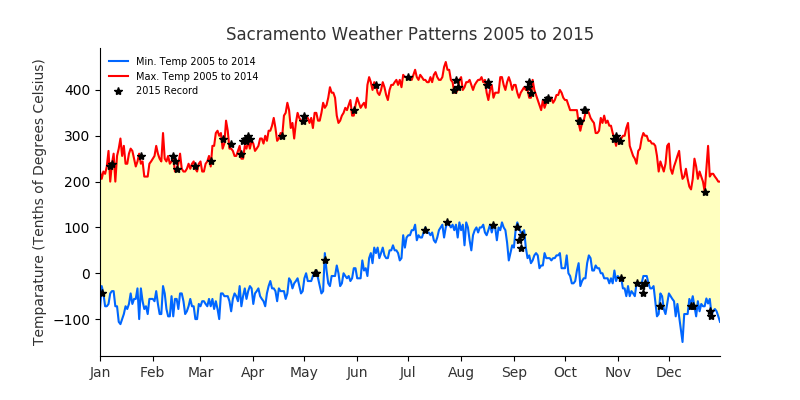

In [105]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

# create a new figure
fig = Figure()
plt.figure(figsize=(8,4))

# get data into series
min_temp=df_min_max_final['min_temp']
max_temp=df_min_max_final['max_temp']
day_month=df_min_max_final['Day_Month']
min_record=df_min_max_final['min_temp_2015']
max_record=df_min_max_final['max_temp_2015']

ax = plt.gca()

# Create the basic plot
plt.plot(min_temp, '-',color = '#0066ff')
plt.plot(max_temp, '-',color = 'r')
plt.plot(min_record, '*',color = 'black')
plt.plot(max_record, '*',color = 'black')

# Set the X axis tick marks
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
intervals = [0,31,59,90,120,151,181,212,243,273,304,334]
plt.xticks(intervals, months,alpha=0.8)

# Set x axis limits
ax.set_xlim(xmin=0, xmax=364)

# Set axis labels and chart title
ax.set_ylabel('Temparature (Tenths of Degrees Celsius)',alpha=0.8)
ax.set_title('Sacramento Weather Patterns 2005 to 2015',alpha=0.8)

# Create the legend
ax.legend(labels = ['Min. Temp 2005 to 2014','Max. Temp 2005 to 2014','2015 Record'], 
          frameon = False,
          fontsize = 7)

# remove the top and right border from the chart
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# fill between the lines
ax.fill_between(range(len(min_temp)), 
                       min_temp, max_temp, 
                       facecolor='yellow', 
                       alpha=0.25)


In [107]:
# Save the figure
plt.savefig('sacramento_weather_patterns.pdf',bbox_inches='tight',dpi=199)